# Bike Sharing Assignment

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# reading the dataframe
df = pd.read_csv('day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# checking the shape of the dataframe
df.shape

(730, 16)

In [4]:
# checking the column name as well as data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking if there are any null values in the dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# checking the mean/median of continous variables using describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Dictionary

### Categorical Variables

season 

1 = Spring

2 = Summer

3 = Fall

4 = Winter

mnth

1 = January

2 = February

3 = March

4 = April

5 = May

6 = June

7 = July

8 = August

9 = September

10 = October

11 = November

12 = December

weekday

0 = Tuesday

1 = Wednesday

2 = Thursday

3 = Friday

4 = Saturday

5 = Sunday

6 = Monday

weathersit

1 = Clear

2 = Misty & Cloudy

3 = Light Snow/Light Rain

4 = Heavy Snow/Heavy Rain

### Binary Variables

yr

0 = 2018

1 = 2019

holiday

0 = No Holiday

1 = Holiday

workingday

0 = Not Workingday

1 = Workingday

Using the data dictionary provided we will change all the values for the categorical variables.


In [7]:
# season
# 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
df['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# mnth 
# 1 = January, 2 = February, 3 = March, 4 = April, 5 = May, 6 = June, 7 = July, 8 = August, 9 = September, 10 = October
# 11 = November, 12 = December
df['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# weekday
# 0 = Tuesday, 1 = Wednesday,2 = Thursday,3 = Friday,4 = Saturday, 5 = Sunday, 6 = Monday
df['weekday'].replace({0:'Tuesday', 1:'Wednesday',2:'Thursday', 3:'Friday',4:'Saturday', 5:'Sunday',
                      6:'Monday'},inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# weathersit
# 0 = Clear, 1 = Misty & Cloudy,2 = Light Snow/Light Rain, 3 = Heavy Snow/Heavy Rain
df['weathersit'].replace({0:'Clear', 1:'Misty & Cloudy',2:'Light Snow/Light Rain',
                          3:'Heavy Snow/Heavy Rain'},inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,0,Light Snow/Light Rain,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,0,Light Snow/Light Rain,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Misty & Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Misty & Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Misty & Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# again checking the column name as well as data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [12]:
# we are dropping certain rows which are unnecessary for our analysis
df = df.drop(['instant' , 'dteday' , 'atemp' , 'casual' , 'registered'], axis=1)
df.shape

(730, 11)

In [13]:
# again checking the column name as well as data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Data Analysis

<Figure size 1080x720 with 0 Axes>

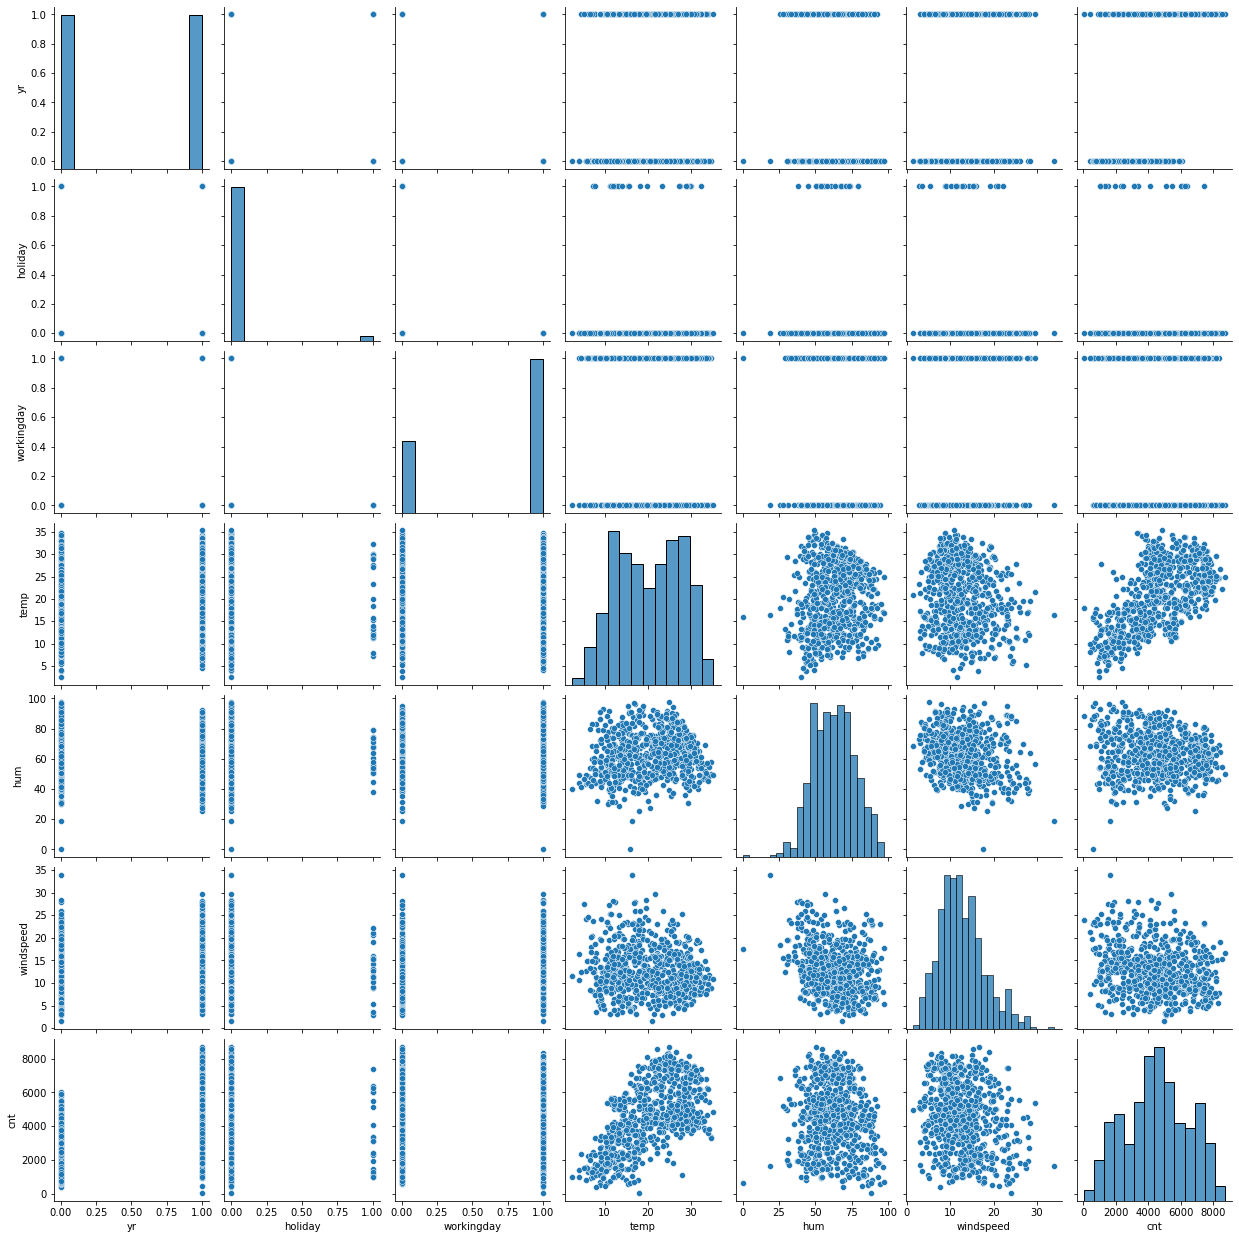

In [14]:
# checking the pair plot of all the continous variables
plt.figure(figsize = (15, 10))
sns.pairplot(df)
plt.show()

In [15]:
#Checking the correlation between the continous variables
df.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


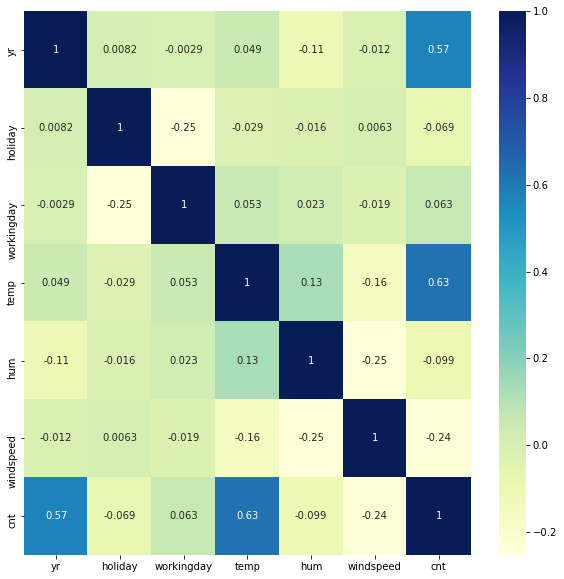

In [16]:
#Checking the correlation between the continous variables using a heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>From the above graph we can see that Temperature and Year has the highest correlation with the demand. Here the correlation of year means that when yr = 1 i.e 2019 as it is a binary variable the cnt/demand is more.</b>

In [17]:
# Here we can see that on an average the demand has rasied considerably during the year 2019
year = pd.pivot_table(df, values='cnt', index='yr', aggfunc=np.median)
year

,cnt
yr,
0,3740
1,5936


In [18]:
# Checking the describe function for all continous variables
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


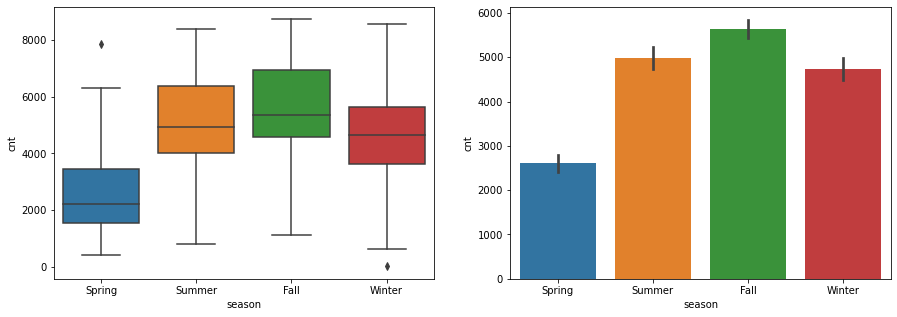

In [19]:
#plotting a boxplot of cnt wrt season
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, y='cnt', x='season',ax=axes[0])
sns.barplot(data=df, y='cnt', x='season',ax=axes[1])
plt.show()

In [20]:
seasons = pd.pivot_table(df, values='cnt', index='season', aggfunc=np.median)
seasons

,cnt
season,
Fall,5353.5
Spring,2222.5
Summer,4941.5
Winter,4634.5


<b>From the above graphs we can see that there is more demand during the fall season. There are few outliers in during spring and winter season but we will ignore them as they are few in number and there could be other factors causing those spike or fall in demands.</b>

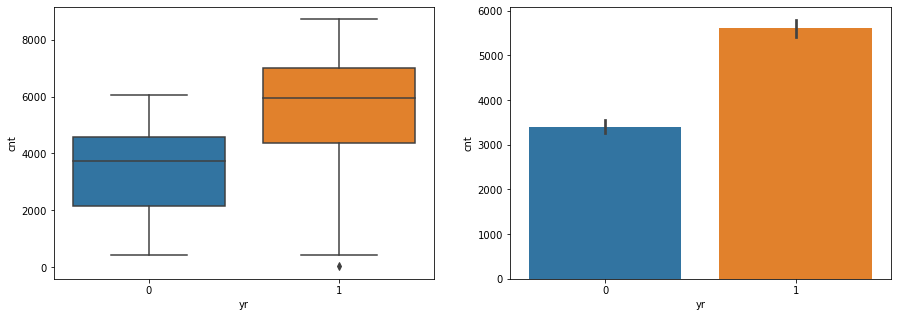

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, y='cnt', x='yr',ax=axes[0])
sns.barplot(data=df, y='cnt', x='yr',ax=axes[1])
plt.show()

<b>From the above graph we can see there is a considerable jump in the demand for the year 2019.</b>

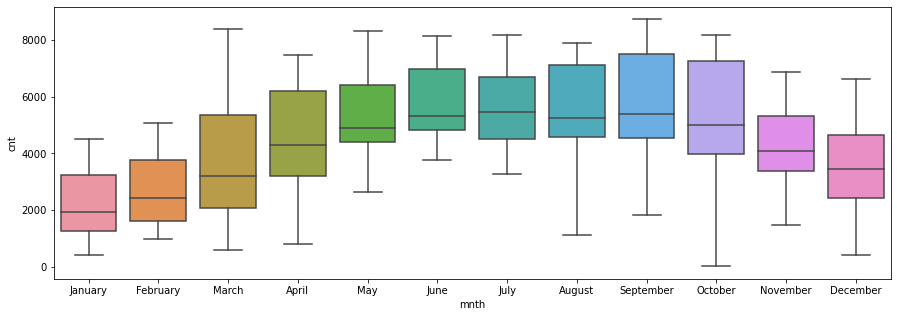

In [22]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df, y='cnt', x='mnth')
plt.show()

<b>Here we can see the demand increases as the year progresses, reaching the maximum during September and then moving down again.</b>

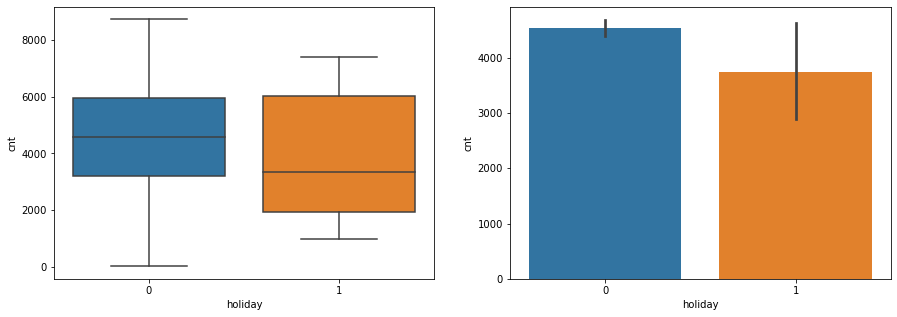

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, y='cnt', x='holiday',ax=axes[0])
sns.barplot(data=df, y='cnt', x='holiday',ax=axes[1])
plt.show()

In [24]:
# Here we can see the on an average demand is less during the holidays
holidays = pd.pivot_table(df, values='cnt', index='holiday', aggfunc=np.median)
holidays

,cnt
holiday,
0,4563
1,3351


<b>From the graph we can see that the demand is less when there is a holiday.</b>

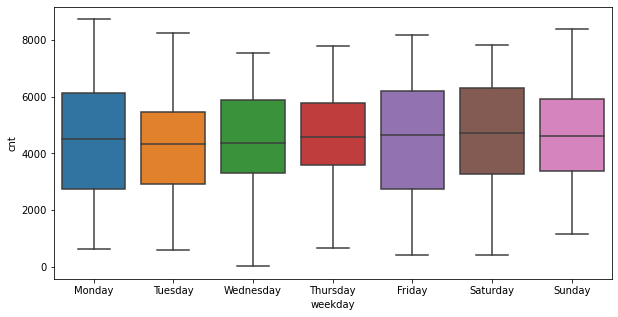

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, y='cnt', x='weekday')
plt.show()

In [26]:
weekdays = pd.pivot_table(df, values='cnt', index='weekday', aggfunc=np.median)
weekdays

,cnt
weekday,
Friday,4656.0
Monday,4521.0
Saturday,4721.0
Sunday,4601.5
Thursday,4576.5
Tuesday,4334.0
Wednesday,4359.0


<b>Here we can see the average demand is quite simmilar between each day. The average highest is on Saturday.</b>

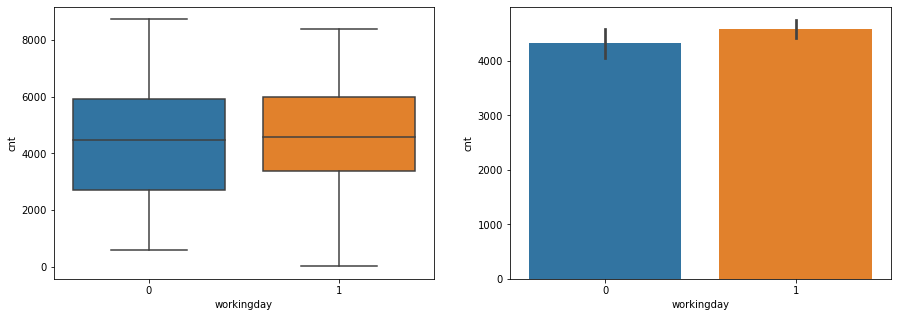

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, y='cnt', x='workingday',ax=axes[0])
sns.barplot(data=df, y='cnt', x='workingday',ax=axes[1])
plt.show()

In [28]:
# Here we can see on an average the demand is more on a workingday
workingdays = pd.pivot_table(df, values='cnt', index='workingday', aggfunc=np.median)
workingdays

,cnt
workingday,
0,4459
1,4585


<b>Here we can see the demand is more on a working day.</b>

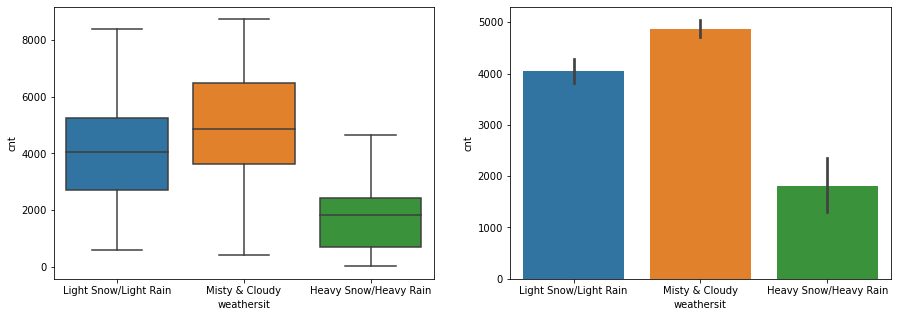

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, y='cnt', x='weathersit',ax=axes[0])
sns.barplot(data=df, y='cnt', x='weathersit',ax=axes[1])
plt.show()

In [30]:
weather = pd.pivot_table(df, values='cnt', index='weathersit', aggfunc=np.median)
weather

,cnt
weathersit,
Heavy Snow/Heavy Rain,1817
Light Snow/Light Rain,4043
Misty & Cloudy,4844


<b>Here we can see that demand is more during Misty & Cloudy days</b>

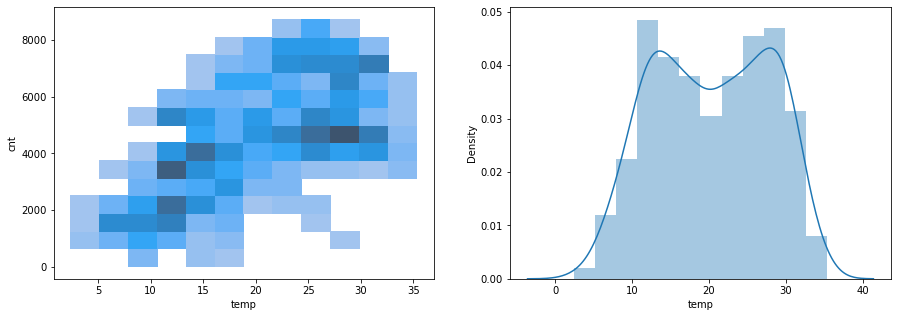

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=df, y='cnt', x='temp',ax=axes[0])
sns.distplot(df['temp'],ax=axes[1])
plt.show()

<b>Here we can see the demand rising with the rise in temperature. General trend is upwards till 30.</b>

## Data Preparation

In [32]:
# Creating dummy variables for all categorical variables
months = pd.get_dummies(df['mnth'],drop_first=True)
weekdays = pd.get_dummies(df['weekday'],drop_first=True)
weather_sit = pd.get_dummies(df['weathersit'],drop_first=True)
season = pd.get_dummies(df['season'],drop_first=True)

In [33]:
# merging the primary dataframe with all dummy variable columns
df = pd.concat([df,months,weekdays,weather_sit,season],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Light Rain,Misty & Cloudy,Spring,Summer,Winter
0,Spring,0,January,0,Monday,0,Light Snow/Light Rain,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,1,0,0
1,Spring,0,January,0,Tuesday,0,Light Snow/Light Rain,14.902598,69.6087,16.652113,...,0,0,0,1,0,1,0,1,0,0
2,Spring,0,January,0,Wednesday,1,Misty & Cloudy,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,1,1,0,0
3,Spring,0,January,0,Thursday,1,Misty & Cloudy,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,1,1,0,0
4,Spring,0,January,0,Friday,1,Misty & Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,1,0,0


In [34]:
# checking the shape of the dataframe
df.shape

(730, 33)

In [35]:
# checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 730 non-null    object 
 1   yr                     730 non-null    int64  
 2   mnth                   730 non-null    object 
 3   holiday                730 non-null    int64  
 4   weekday                730 non-null    object 
 5   workingday             730 non-null    int64  
 6   weathersit             730 non-null    object 
 7   temp                   730 non-null    float64
 8   hum                    730 non-null    float64
 9   windspeed              730 non-null    float64
 10  cnt                    730 non-null    int64  
 11  August                 730 non-null    uint8  
 12  December               730 non-null    uint8  
 13  February               730 non-null    uint8  
 14  January                730 non-null    uint8  
 15  July  

In [36]:
# droping the original columns from which we have derived the dummy variables
df = df.drop(['season','mnth','weekday','weathersit'], axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Light Rain,Misty & Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [37]:
# checking the shape of the dataframe again
df.shape

(730, 29)

In [38]:
# checking the info of the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   August                 730 non-null    uint8  
 8   December               730 non-null    uint8  
 9   February               730 non-null    uint8  
 10  January                730 non-null    uint8  
 11  July                   730 non-null    uint8  
 12  June                   730 non-null    uint8  
 13  March                  730 non-null    uint8  
 14  May                    730 non-null    uint8  
 15  Novemb

In [39]:
# converting the binary variables to the same data type as other dummy variables
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    uint8  
 1   holiday                730 non-null    uint8  
 2   workingday             730 non-null    uint8  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   August                 730 non-null    uint8  
 8   December               730 non-null    uint8  
 9   February               730 non-null    uint8  
 10  January                730 non-null    uint8  
 11  July                   730 non-null    uint8  
 12  June                   730 non-null    uint8  
 13  March                  730 non-null    uint8  
 14  May                    730 non-null    uint8  
 15  Novemb

## Test-Train Split

In [40]:
# Here we have split the data into a training set and a test set
df_train ,df_test =  train_test_split(df, train_size=0.7, test_size=0.3, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [41]:
# We are using Min-Max/ Normalisation Scaling 
scaler = MinMaxScaler()

In [42]:
# Applying scaler to all the numerical columns except the dummy variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Light Rain,Misty & Cloudy,Spring,Summer,Winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,1,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,1,0,0,1,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train  = df_train

In [44]:
# Checking the head of X_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,August,December,February,January,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Light Rain,Misty & Cloudy,Spring,Summer,Winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Creating a Linear Regression Model and Feature Selection

In [45]:
# We will be using Recursive Feature Elimination and select 15 Features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
# Listing all the columns with RFE support and their RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 8),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 9),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', False, 6),
 ('Thursday', False, 10),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12),
 ('Light Snow/Light Rain', True, 1),
 ('Misty & Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [47]:
# These are the 15 feature given to us by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'January',
       'July', 'September', 'Monday', 'Light Snow/Light Rain',
       'Misty & Cloudy', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [48]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable and running our linear model
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        22:40:38   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [50]:
# Checking the VIF(Variance Inflation Factor)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                 Features    VIF
4                     hum  25.64
3                    temp  22.83
11         Misty & Cloudy  14.85
10  Light Snow/Light Rain   9.02
12                 Spring   5.69
2              workingday   5.42
5               windspeed   4.68
14                 Winter   4.14
13                 Summer   3.20
0                      yr   2.10
9                  Monday   2.00
6                 January   1.70
7                    July   1.59
8               September   1.40
1                 holiday   1.19


<b>We will check the p-value and VIF for feature selection as we can see 'hum' has a very high VIF so we will drop that.</b>

In [51]:
# Dropping hum and creating a new dataframe
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [52]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.33e-189
Time:                        22:40:38   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [53]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                 Features    VIF
10         Misty & Cloudy  14.84
3                    temp  13.95
9   Light Snow/Light Rain   8.43
2              workingday   5.34
4               windspeed   4.67
11                 Spring   4.48
12                 Summer   2.77
13                 Winter   2.76
0                      yr   2.08
8                  Monday   1.99
5                 January   1.66
6                    July   1.59
7               September   1.35
1                 holiday   1.18


<b>We can see that 'Misty & Cloudy' has high VIF so we are dropping that.</b>

In [54]:
# Dropping Misty & Cloudy and creating a new dataframe
X_train_new2 = X_train_new.drop(['Misty & Cloudy'], axis = 1)

In [55]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.51e-162
Time:                        22:40:38   Log-Likelihood:                 445.79
No. Observations:                 510   AIC:                            -863.6
Df Residuals:                     496   BIC:                            -804.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [56]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                 Features   VIF
3                    temp  7.06
2              workingday  5.22
4               windspeed  4.62
10                 Spring  3.07
11                 Summer  2.33
0                      yr  2.07
12                 Winter  1.97
8                  Monday  1.96
5                 January  1.62
6                    July  1.59
9   Light Snow/Light Rain  1.55
7               September  1.34
1                 holiday  1.17


<b>'Holiday' has a high p value so we will drop that</b>

In [57]:
# Dropping holiday and creating a new dataframe
X_train_new3 = X_train_new2.drop(['holiday'], axis = 1)

In [58]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.91e-163
Time:                        22:40:38   Log-Likelihood:                 444.53
No. Observations:                 510   AIC:                            -863.1
Df Residuals:                     497   BIC:                            -808.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [59]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                 Features   VIF
2                    temp  6.81
1              workingday  4.66
3               windspeed  4.60
9                  Spring  2.99
10                 Summer  2.31
0                      yr  2.07
11                 Winter  1.91
7                  Monday  1.83
4                 January  1.62
5                    July  1.59
8   Light Snow/Light Rain  1.55
6               September  1.33


<b>'January' has a high p-value so we are dropping that.</b>

In [60]:
# Dropping January and creating a new dataframe
X_train_new4 = X_train_new3.drop(['January'], axis = 1)

In [61]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.25e-163
Time:                        22:40:38   Log-Likelihood:                 443.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     498   BIC:                            -811.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [62]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                 Features   VIF
2                    temp  6.72
1              workingday  4.63
3               windspeed  4.58
8                  Spring  2.38
9                  Summer  2.31
0                      yr  2.06
10                 Winter  1.91
6                  Monday  1.82
4                    July  1.58
7   Light Snow/Light Rain  1.54
5               September  1.33


<b>'Spring' has a high p-value and a high VIF so we are dropping that.</b>

In [63]:
# Dropping Spring and creating a new dataframe
X_train_new5 = X_train_new4.drop(['Spring'], axis = 1)

In [64]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.94e-163
Time:                        22:40:38   Log-Likelihood:                 439.84
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     499   BIC:                            -811.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [65]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                Features   VIF
2                   temp  6.34
1             workingday  4.04
3              windspeed  3.41
0                     yr  2.01
8                 Summer  1.75
6                 Monday  1.69
4                   July  1.53
7  Light Snow/Light Rain  1.51
9                 Winter  1.45
5              September  1.28


<b>'July' has a high p-value so we are dropping that.</b>

In [66]:
# Dropping July and creating a new dataframe
X_train_new6 = X_train_new5.drop(['July'], axis = 1)

In [67]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.01e-163
Time:                        22:40:38   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [68]:
# Checking the VIF(Variance Inflation Factor) again
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                Features   VIF
2                   temp  4.76
1             workingday  4.02
3              windspeed  3.39
0                     yr  2.01
5                 Monday  1.68
7                 Summer  1.57
6  Light Snow/Light Rain  1.50
8                 Winter  1.38
4              September  1.20


<b>Now the p-Value is 0 thus all feature are significant and our VIF is also under 5. The R-squared is 0.791 and Adjusted R-squared is 0.787. Let's drop temp variable too see if we can improve on the model.</b>

In [69]:
# Dropping temp and creating a new dataframe
X_train_new7 = X_train_new6.drop(['temp'], axis = 1)

In [70]:
# Again adding a constant variable to our new dataframe and running our linear model
X_train_lm = sm.add_constant(X_train_new7)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     71.67
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.15e-78
Time:                        22:40:38   Log-Likelihood:                 233.05
No. Observations:                 510   AIC:                            -448.1
Df Residuals:                     501   BIC:                            -410.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

<b>Droping temp is reducing the R-squared from 0.791 to 0.534 which is a massive drop thus we will keep the temp variable.</b>

In [71]:
X_train_lm = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.01e-163
Time:                        22:40:39   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

<b>Thus this will be our final model</b>

<b>R-squared:  0.791</b>

<b>Adj. R-squared: 0.787</b>

<b>Prob (F-statistic): 1.01e-163</b>

<b>y = mx + c

<b>We can see that the equation of our best fitted line is:</b>

<b>cnt = 0.2389*yr +0.0482*workingday +0.5515*temp -0.1839*windspeed +0.0874*September +0.0593*Monday
-0.0677*Light Snow/Light Rain +0.0875*Summer +0.1174*Winter + 0.0788 </b>

## Residual Analysis

In [72]:
y_train_pred  = lm.predict(X_train_lm)

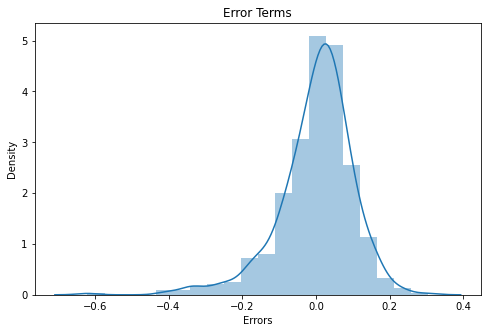

In [73]:
# Plot the histogram of the error terms
plt.figure(figsize = (8,5))
res = y_train - y_train_pred
sns.distplot(res, bins =20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

<b>Here we can see the Error Terms are normaly distibuted. Thus, satisfying one of the assumption of linear regression.</b>

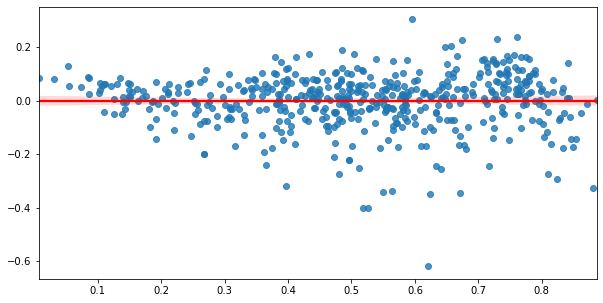

In [74]:
plt.figure(figsize = (10,5))
sns.regplot(y_train_pred, res, line_kws={"color": "red"})
plt.show()

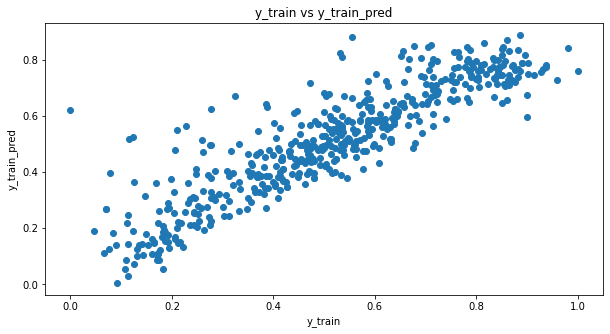

In [75]:
plt.figure(figsize = (10,5))
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')                        
plt.ylabel('y_train_pred')
plt.show()

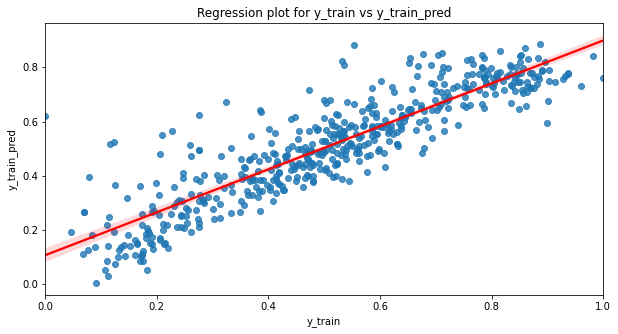

In [76]:
plt.figure(figsize = (10,5))
sns.regplot(y_train, y_train_pred, line_kws={"color": "red"})
plt.title('Regression plot for y_train vs y_train_pred')
plt.xlabel('y_train')                        
plt.ylabel('y_train_pred')
plt.show()

In [77]:
# R-squared score of training set
r2_score(y_train, y_train_pred)

0.7910386989832587

## Making Predictions

In [78]:
# Now we are scaling the test set
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Light Rain,Misty & Cloudy,Spring,Summer,Winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [79]:
# Dividing into X and Y sets on the test set
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Creating new dataframe having all the columns from our final model
X_test_new = X_test[X_train_new6.columns]

In [81]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [82]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

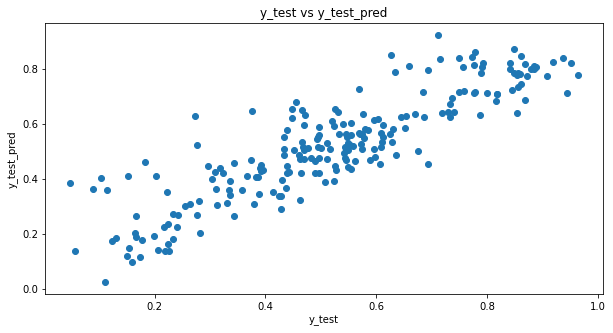

In [83]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')                        
plt.ylabel('y_test_pred')
plt.show()

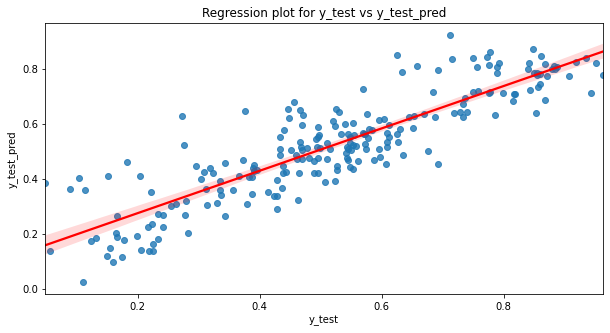

In [84]:
# Plotting y_test and y_pred with regression line
plt.figure(figsize = (10,5))
sns.regplot(y_test , y_test_pred, line_kws={"color": "red"})
plt.title('Regression plot for y_test vs y_test_pred')
plt.xlabel('y_test')                        
plt.ylabel('y_test_pred')
plt.show()

In [85]:
# R-squared score of test set
r2_score(y_test, y_test_pred)

0.7691626302875547

<b>The R-squared for the training set was 0.791 and for test set it is 0.769 which is having 2.2% of variation which is less than 5%.</b>

Mean Absolute Error

In [86]:
print(metrics.mean_absolute_error(y_test,y_test_pred))

0.08037231703340438


Root Mean Squared Error

In [87]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

0.10470820133006935


In [88]:
# correlation between the final feature set
X_train_new6.corr()

,yr,workingday,temp,windspeed,September,Monday,Light Snow/Light Rain,Summer,Winter
yr,1.000000,0.031808,0.107288,-0.001108,0.002574,-0.033817,-0.015469,0.013856,-0.022638
workingday,0.031808,1.000000,0.067787,-0.043176,0.019495,-0.619074,0.040766,0.043274,-0.057297
temp,0.107288,0.067787,1.000000,-0.187396,0.207457,-0.042274,-0.090161,0.125582,-0.233697
windspeed,-0.001108,-0.043176,-0.187396,1.000000,-0.121734,0.049356,-0.030385,0.110089,-0.090649
September,0.002574,0.019495,0.207457,-0.121734,1.000000,-0.006996,0.044527,-0.168473,-0.020175
Monday,-0.033817,-0.619074,-0.042274,0.049356,-0.006996,1.000000,0.010184,-0.017169,0.016635
Light Snow/Light Rain,-0.015469,0.040766,-0.090161,-0.030385,0.044527,0.010184,1.000000,0.039442,0.023127
Summer,0.013856,0.043274,0.125582,0.110089,-0.168473,-0.017169,0.039442,1.000000,-0.328116
Winter,-0.022638,-0.057297,-0.233697,-0.090649,-0.020175,0.016635,0.023127,-0.328116,1.000000


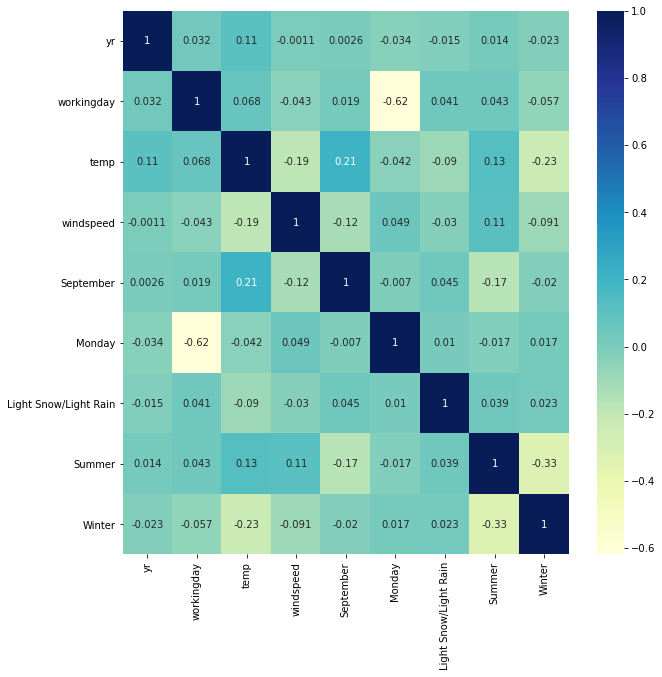

In [89]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train_new6.corr(), annot = True, cmap="YlGnBu")
plt.show()